## **Over & Under Performers**

Based on xPts | 2024/25

Expected Points = (3×𝑃win) + (1×𝑃draw) + (0×𝑃loss)

In [1]:
#imports
import pandas as pd
import numpy as np
from scipy.stats import poisson

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.gridspec as gridspec
import seaborn as sns
from highlight_text import fig_text, ax_text
import matplotlib.patheffects as path_effects
import matplotlib.colors as mcolors
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap, Normalize

from PIL import Image
import urllib

##### **Data Retrieval**

In [2]:
SerieA_schedule = 'https://fbref.com/en/comps/11/schedule/Serie-A-Scores-and-Fixtures'
SerieB_schedule = 'https://fbref.com/en/comps/18/schedule/Serie-B-Scores-and-Fixtures'

In [3]:
#LaLiga_schedule = 'https://fbref.com/en/comps/12/schedule/La-Liga-Scores-and-Fixtures'
#EPL_schedule = 'https://fbref.com/en/comps/9/schedule/Premier-League-Scores-and-Fixtures'
#Bundesliga_schedule = 'https://fbref.com/en/comps/20/schedule/Bundesliga-Scores-and-Fixtures'

In [4]:
df_SerieA = pd.read_html(SerieA_schedule)[0]
df_SerieA.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Sat,2024-08-17,18:30,Genoa,2.1,2–2,1.9,Inter,NaN,Stadio Comunale Luigi Ferraris,NaN,Match Report,NaN
1,1.0,Sat,2024-08-17,18:30,Parma,1.7,1–1,0.7,Fiorentina,NaN,Stadio Ennio Tardini,NaN,Match Report,NaN
2,1.0,Sat,2024-08-17,20:45,Milan,2.1,2–2,1.0,Torino,NaN,Stadio Giuseppe Meazza,NaN,Match Report,NaN
3,1.0,Sat,2024-08-17,20:45,Empoli,0.5,0–0,0.3,Monza,NaN,Stadio Carlo Castellani - Computer Gross...,NaN,Match Report,NaN
4,1.0,Sun,2024-08-18,18:30,Hellas Verona,1.7,3–0,1.0,Napoli,NaN,Stadio Marc'Antonio Bentegodi,NaN,Match Report,NaN


In [5]:
df_SerieB = pd.read_html(SerieB_schedule)[0]
df_SerieB.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Fri,2024-08-16,20:30,Brescia,1.4,1–0,0.5,Palermo,NaN,Stadio Mario Rigamonti,NaN,Match Report,NaN
1,1.0,Sat,2024-08-17,20:30,Südtirol,0.8,2–1,0.3,Modena,NaN,Stadio Druso,NaN,Match Report,NaN
2,1.0,Sat,2024-08-17,20:30,Pisa,2.2,2–2,1.0,Spezia,NaN,Arena Garibaldi - Stadio Romeo Anconetan...,NaN,Match Report,NaN
3,1.0,Sat,2024-08-17,20:30,Salernitana,1.3,2–1,0.5,Cittadella,NaN,Stadio Arechi,NaN,Match Report,NaN
4,1.0,Sat,2024-08-17,20:30,Bari,1.2,1–3,1.4,Juve Stabia,NaN,Stadio Comunale San Nicola,NaN,Match Report,NaN


In [6]:
# save to csv
df_SerieA.to_csv('../data/df_SerieA_2425.csv', index=False)
df_SerieB.to_csv('../data/df_SerieB_2425.csv', index=False)

##### **Data Preparation**

In [7]:
df_combined = pd.concat([df_SerieA, df_SerieB], axis=0, ignore_index=True)
df_combined

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Sat,2024-08-17,18:30,Genoa,2.1,2–2,1.9,Inter,NaN,Stadio Comunale Luigi Ferraris,NaN,Match Report,NaN
1,1.0,Sat,2024-08-17,18:30,Parma,1.7,1–1,0.7,Fiorentina,NaN,Stadio Ennio Tardini,NaN,Match Report,NaN
2,1.0,Sat,2024-08-17,20:45,Milan,2.1,2–2,1.0,Torino,NaN,Stadio Giuseppe Meazza,NaN,Match Report,NaN
3,1.0,Sat,2024-08-17,20:45,Empoli,0.5,0–0,0.3,Monza,NaN,Stadio Carlo Castellani - Computer Gross...,NaN,Match Report,NaN
4,1.0,Sun,2024-08-18,18:30,Hellas Verona,1.7,3–0,1.0,Napoli,NaN,Stadio Marc'Antonio Bentegodi,NaN,Match Report,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,38.0,Fri,2025-05-09,NaN,Sampdoria,NaN,NaN,NaN,Salernitana,NaN,Stadio Comunale Luigi Ferraris,NaN,Head-to-Head,NaN
830,38.0,Fri,2025-05-09,NaN,Cittadella,NaN,NaN,NaN,Bari,NaN,Stadio Pier Cesare Tombolato,NaN,Head-to-Head,NaN
831,38.0,Fri,2025-05-09,NaN,Palermo,NaN,NaN,NaN,Frosinone,NaN,Stadio Renzo Barbera,NaN,Head-to-Head,NaN
832,38.0,Fri,2025-05-09,NaN,Juve Stabia,NaN,NaN,NaN,Reggiana,NaN,Stadio Comunale Romeo Menti,NaN,Head-to-Head,NaN


In [8]:
def process_dataframe(df):
    # drop useless columns
    columns_to_drop = ['Day', 'Time', 'Attendance', 'Venue', 'Referee', 'Notes']
    df.drop(columns=columns_to_drop, inplace=True, errors='ignore')  # errors='ignore' in case some columns are missing
    
    # filter matches that have been played (make a copy to avoid SettingWithCopyWarning)
    df = df.loc[df['Match Report'] == 'Match Report'].copy()
    df.drop(columns=['Match Report'], inplace=True, errors='ignore')
    
    # obtain home & away goals from the score column (use .loc)
    df[['home_goals', 'away_goals']] = df['Score'].str.split('–', n=1, expand=True)
    df.drop(columns=['Score'], inplace=True, errors='ignore')
    
    # rename dataframe columns
    df.columns = ['week', 'date', 'home', 'xG_home', 'xG_away', 'away', 'home_goals', 'away_goals']
    
    return df

In [9]:
# process dataframes
df_combined = process_dataframe(df_combined)
print(df_combined.head())

   week        date           home  xG_home  xG_away        away home_goals   
0   1.0  2024-08-17          Genoa      2.1      1.9       Inter          2  \
1   1.0  2024-08-17          Parma      1.7      0.7  Fiorentina          1   
2   1.0  2024-08-17          Milan      2.1      1.0      Torino          2   
3   1.0  2024-08-17         Empoli      0.5      0.3       Monza          0   
4   1.0  2024-08-18  Hellas Verona      1.7      1.0      Napoli          3   

  away_goals  
0          2  
1          1  
2          2  
3          0  
4          0  


Iterate over each match to calculate xP and points of each team and add a column dataframe with: `xp_home`, `xp_away` `points_home`, `points_away`.

In [10]:
def calculate_points(home_goals, away_goals):
    if home_goals > away_goals:
        return 3, 0  # home wins
    elif home_goals == away_goals:
        return 1, 1  # draw
    else:
        return 0, 3  # away wins

In [11]:
def calculate_xp(xG_home, xG_away):
    prob_home_win = 0
    prob_draw = 0
    prob_away_win = 0

    for x in range(10):  # simulate local goals
        for y in range(10):  # simulate away goals
            value = round(poisson.pmf(x, xG_home) * poisson.pmf(y, xG_away) * 100, 3)  # poisson result
            if x > y:  # home win prob
                prob_home_win += value
            elif x == y:  # draw prob
                prob_draw += value
            else:  # away win prob
                prob_away_win += value

    home_xPts = (prob_home_win / 100) * 3 + (prob_draw / 100)
    away_xPts = (prob_away_win / 100) * 3 + (prob_draw / 100)

    return [round(home_xPts, 2), round(away_xPts, 2)]

In [12]:
def compute_xp_and_points(row):
    xp_home, xp_away = calculate_xp(row['xG_home'], row['xG_away'])
    points_home, points_away = calculate_points(row['home_goals'], row['away_goals'])
    
    return pd.Series({
        'xPts_home': xp_home,
        'xPts_away': xp_away,
        'points_home': points_home,
        'points_away': points_away
    })

In [13]:
# apply the function to each row and assign the results to new columns
df_combined[['xPts_home', 'xPts_away', 'points_home', 'points_away']] = df_combined.apply(compute_xp_and_points, axis=1)
df_combined.head()

,week,date,home,xG_home,xG_away,away,home_goals,away_goals,xPts_home,xPts_away,points_home,points_away
0,1.0,2024-08-17,Genoa,2.1,1.9,Inter,2,2,1.51,1.28,1.0,1.0
1,1.0,2024-08-17,Parma,1.7,0.7,Fiorentina,1,1,2.08,0.69,1.0,1.0
2,1.0,2024-08-17,Milan,2.1,1.0,Torino,2,2,2.08,0.72,1.0,1.0
3,1.0,2024-08-17,Empoli,0.5,0.3,Monza,0,0,1.46,1.03,1.0,1.0
4,1.0,2024-08-18,Hellas Verona,1.7,1.0,Napoli,3,0,1.85,0.91,3.0,0.0


In [14]:
# save to csv
df_combined.to_csv('../data/df_combined_2425.csv', index=False)

##### **Data Modeling**

In [15]:
df_home = df_combined[['home', 'xPts_home', 'points_home']]
df_home = df_home.groupby(['home']).sum()
df_home

,xPts_home,points_home
home,,
Atalanta,3.11,3.0
Bari,6.42,5.0
Bologna,4.33,3.0
Brescia,7.82,9.0
Cagliari,5.35,2.0
Carrarese,4.79,4.0
Catanzaro,4.64,5.0
Cesena,6.12,10.0
Cittadella,3.46,2.0


In [16]:
df_away = df_combined[['away', 'xPts_away', 'points_away']]
df_away = df_away.groupby(['away']).sum()
df_away

,xPts_away,points_away
away,,
Atalanta,7.32,4.0
Bari,4.00,4.0
Bologna,3.20,4.0
Brescia,2.40,3.0
Cagliari,2.86,3.0
Carrarese,2.87,0.0
Catanzaro,2.41,2.0
Cesena,3.40,1.0
Cittadella,2.95,6.0


Perform an inner join between df_home and df_away, calculate new columns points, xPts, and diff, and select only these columns.

In [17]:
# perform an inner join between df_home and df_away
df_result = pd.concat([df_home, df_away], axis=1, join='inner').round(2)

# calculate new columns
df_result['points'] = df_result['points_home'] + df_result['points_away']
df_result['xPts'] = df_result['xPts_home'] + df_result['xPts_away']
df_result['diff'] = df_result['points'] - df_result['xPts']

# select only the new columns
df_result = df_result[['points', 'xPts', 'diff']]
df_result

,points,xPts,diff
Atalanta,7.0,10.43,-3.43
Bari,9.0,10.42,-1.42
Bologna,7.0,7.53,-0.53
Brescia,12.0,10.22,1.78
Cagliari,5.0,8.21,-3.21
Carrarese,4.0,7.66,-3.66
Catanzaro,7.0,7.05,-0.05
Cesena,11.0,9.52,1.48
Cittadella,8.0,6.41,1.59
Como,8.0,8.62,-0.62


Sort by `points` to obtain the actual standings.

In [18]:
df_result.sort_values(by=['points'], ascending=False)

,points,xPts,diff
Pisa,14.0,11.59,2.41
Napoli,13.0,10.31,2.69
Spezia,13.0,11.68,1.32
Juventus,12.0,11.10,0.90
Sassuolo,12.0,9.82,2.18
Brescia,12.0,10.22,1.78
Cesena,11.0,9.52,1.48
Milan,11.0,11.35,-0.35
Palermo,11.0,10.13,0.87
Torino,11.0,6.86,4.14


Sort by `xPts` to get the expected points standings.

In [19]:
df_result.sort_values(by=['xPts'], ascending=False)

,points,xPts,diff
Spezia,13.0,11.68,1.32
Pisa,14.0,11.59,2.41
Südtirol,9.0,11.44,-2.44
Milan,11.0,11.35,-0.35
Juventus,12.0,11.10,0.90
Cosenza,9.0,10.95,-1.95
Modena,8.0,10.76,-2.76
Inter,11.0,10.65,0.35
Lazio,10.0,10.49,-0.49
Atalanta,7.0,10.43,-3.43


Sort by `diff` to get the difference standings.

In [20]:
df_result.sort_values(by=['diff'], ascending=False)

,points,xPts,diff
Udinese,10.0,5.80,4.20
Torino,11.0,6.86,4.14
Empoli,10.0,6.82,3.18
Napoli,13.0,10.31,2.69
Pisa,14.0,11.59,2.41
Sassuolo,12.0,9.82,2.18
Brescia,12.0,10.22,1.78
Cittadella,8.0,6.41,1.59
Cesena,11.0,9.52,1.48
Spezia,13.0,11.68,1.32


##### **Data Visualization**

In [21]:
df_underperformers = df_result.sort_values(by='diff').head(3)
df_underperformers.reset_index(inplace=True)
df_underperformers.rename(columns={'index': 'team'}, inplace=True)
df_underperformers

,team,points,xPts,diff
0,Carrarese,4.0,7.66,-3.66
1,Atalanta,7.0,10.43,-3.43
2,Cagliari,5.0,8.21,-3.21


In [22]:
df_overperformers = df_result.sort_values(by='diff', ascending=False).head(3)
df_overperformers.reset_index(inplace=True)
df_overperformers.rename(columns={'index': 'team'}, inplace=True)
df_overperformers

,team,points,xPts,diff
0,Udinese,10.0,5.80,4.20
1,Torino,11.0,6.86,4.14
2,Empoli,10.0,6.82,3.18


In [23]:
df_overunder = pd.concat([df_underperformers, df_overperformers], axis=0)
df_overunder

,team,points,xPts,diff
0,Carrarese,4.0,7.66,-3.66
1,Atalanta,7.0,10.43,-3.43
2,Cagliari,5.0,8.21,-3.21
0,Udinese,10.0,5.80,4.20
1,Torino,11.0,6.86,4.14
2,Empoli,10.0,6.82,3.18


Is Serie B actually a fairer league than Serie A?

In [24]:
team_map = {
    'team': [
        'Carrarese',
        'Atalanta',
        'Cagliari',
        'Udinese',
        'Torino',
        'Empoli'
    ],
    'fotmob_id':[
        6488,
        8524,
        8529,
        8600,
        9804,
        8534
    ],
    'country':[
        'ita',
        'ita',
        'ita',
        'ita',
        'ita',
        'ita'
    ]
}

team_map = pd.DataFrame(team_map)
team_map

,team,fotmob_id,country
0,Carrarese,6488,ita
1,Atalanta,8524,ita
2,Cagliari,8529,ita
3,Udinese,8600,ita
4,Torino,9804,ita
5,Empoli,8534,ita


In [25]:
df_overunder = pd.merge(df_overunder, team_map)
df_overunder

,team,points,xPts,diff,fotmob_id,country
0,Carrarese,4.0,7.66,-3.66,6488,ita
1,Atalanta,7.0,10.43,-3.43,8524,ita
2,Cagliari,5.0,8.21,-3.21,8529,ita
3,Udinese,10.0,5.80,4.20,8600,ita
4,Torino,11.0,6.86,4.14,9804,ita
5,Empoli,10.0,6.82,3.18,8534,ita


In [26]:
# function that takes the timeline of xPoints and actual points
def get_cumpoints_df(team, data = df_combined):
    df = data.copy()
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
    is_in_home = df[(df['home'] == team)][['home', 'points_home', 'xPts_home', 'date']].reset_index(drop=True)
    is_in_away = df[(df['away'] == team)][['away', 'points_away', 'xPts_away', 'date']].reset_index(drop=True)
    is_in_home.columns = ['team', 'points', 'xPts', 'date']
    is_in_away.columns = ['team', 'points', 'xPts', 'date']
    df = pd.concat([is_in_home, is_in_away]).sort_values(by='date', ascending=True).reset_index(drop=True)
    df['cum_points'] = df['points'].cumsum()
    df['cum_xPts'] = df['xPts'].cumsum()
    return df

In [27]:
# Check to see if it works
get_cumpoints_df('Carrarese')

,team,points,xPts,date,cum_points,cum_xPts
0,Carrarese,0.0,1.20,2024-08-18,0.0,1.20
1,Carrarese,0.0,1.02,2024-08-24,0.0,2.22
2,Carrarese,3.0,1.81,2024-08-27,3.0,4.03
3,Carrarese,0.0,0.40,2024-09-01,3.0,4.43
4,Carrarese,0.0,0.81,2024-09-15,3.0,5.24
5,Carrarese,0.0,0.25,2024-09-22,3.0,5.49
6,Carrarese,1.0,2.17,2024-09-28,4.0,7.66


In [32]:
def plot_point_difference(ax, team, label_y=False, data=df_combined):
    # set grid and spine properties
    ax.grid(ls='--', color='lightgrey')
    for spine in ax.spines.values():
        spine.set_edgecolor('lightgrey')
        spine.set_linestyle('dashed')
    ax.tick_params(color='lightgrey', labelsize=8, labelcolor='grey')

    # get cumulative points DataFrame
    test_df = get_cumpoints_df(team, data)

    # plot cumulative points and expected points
    for column, color in zip(['cum_points', 'cum_xPts'], ['#00985F', '#DD3636']):
        ax.plot(test_df.index + 1, test_df[column], marker='o', mfc='white', ms=5, color=color)

    # set y-axis properties
    ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
    ax.set_ylim(-1, 22)
    ax.set_xlim(0.25)
    ax.set_xticklabels([])

    # calculate difference and mid-point for annotation
    last_points = test_df['cum_points'].iloc[-1]
    last_xPts = test_df['cum_xPts'].iloc[-1]
    mid_point = last_points + (last_xPts - last_points) / 2
    difference = last_points - last_xPts

    # annotate the difference
    text = ax.annotate(
        xy=(ax.get_xlim()[1], mid_point),
        text=f'{difference:.1f}',
        xytext=(-5, 0),
        ha='center',
        va='center',
        color='black',
        weight='bold',
        size=7,
        textcoords='offset points'
    )

    # set y-label if required
    if label_y:
        ax.set_ylabel('Points', color='grey', size=8)
    else:
        ax.set_yticklabels([])

C:\Users\FC\AppData\Local\Temp\ipykernel_21300\3818621985.py:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  logo_ax = plt.subplot(gspec[row, col], anchor='NW', facecolor='#EFE9E6')
C:\Users\FC\AppData\Local\Temp\ipykernel_21300\3818621985.py:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  logo_ax = plt.subplot(gspec[row, col], anchor='NW', facecolor='#EFE9E6')


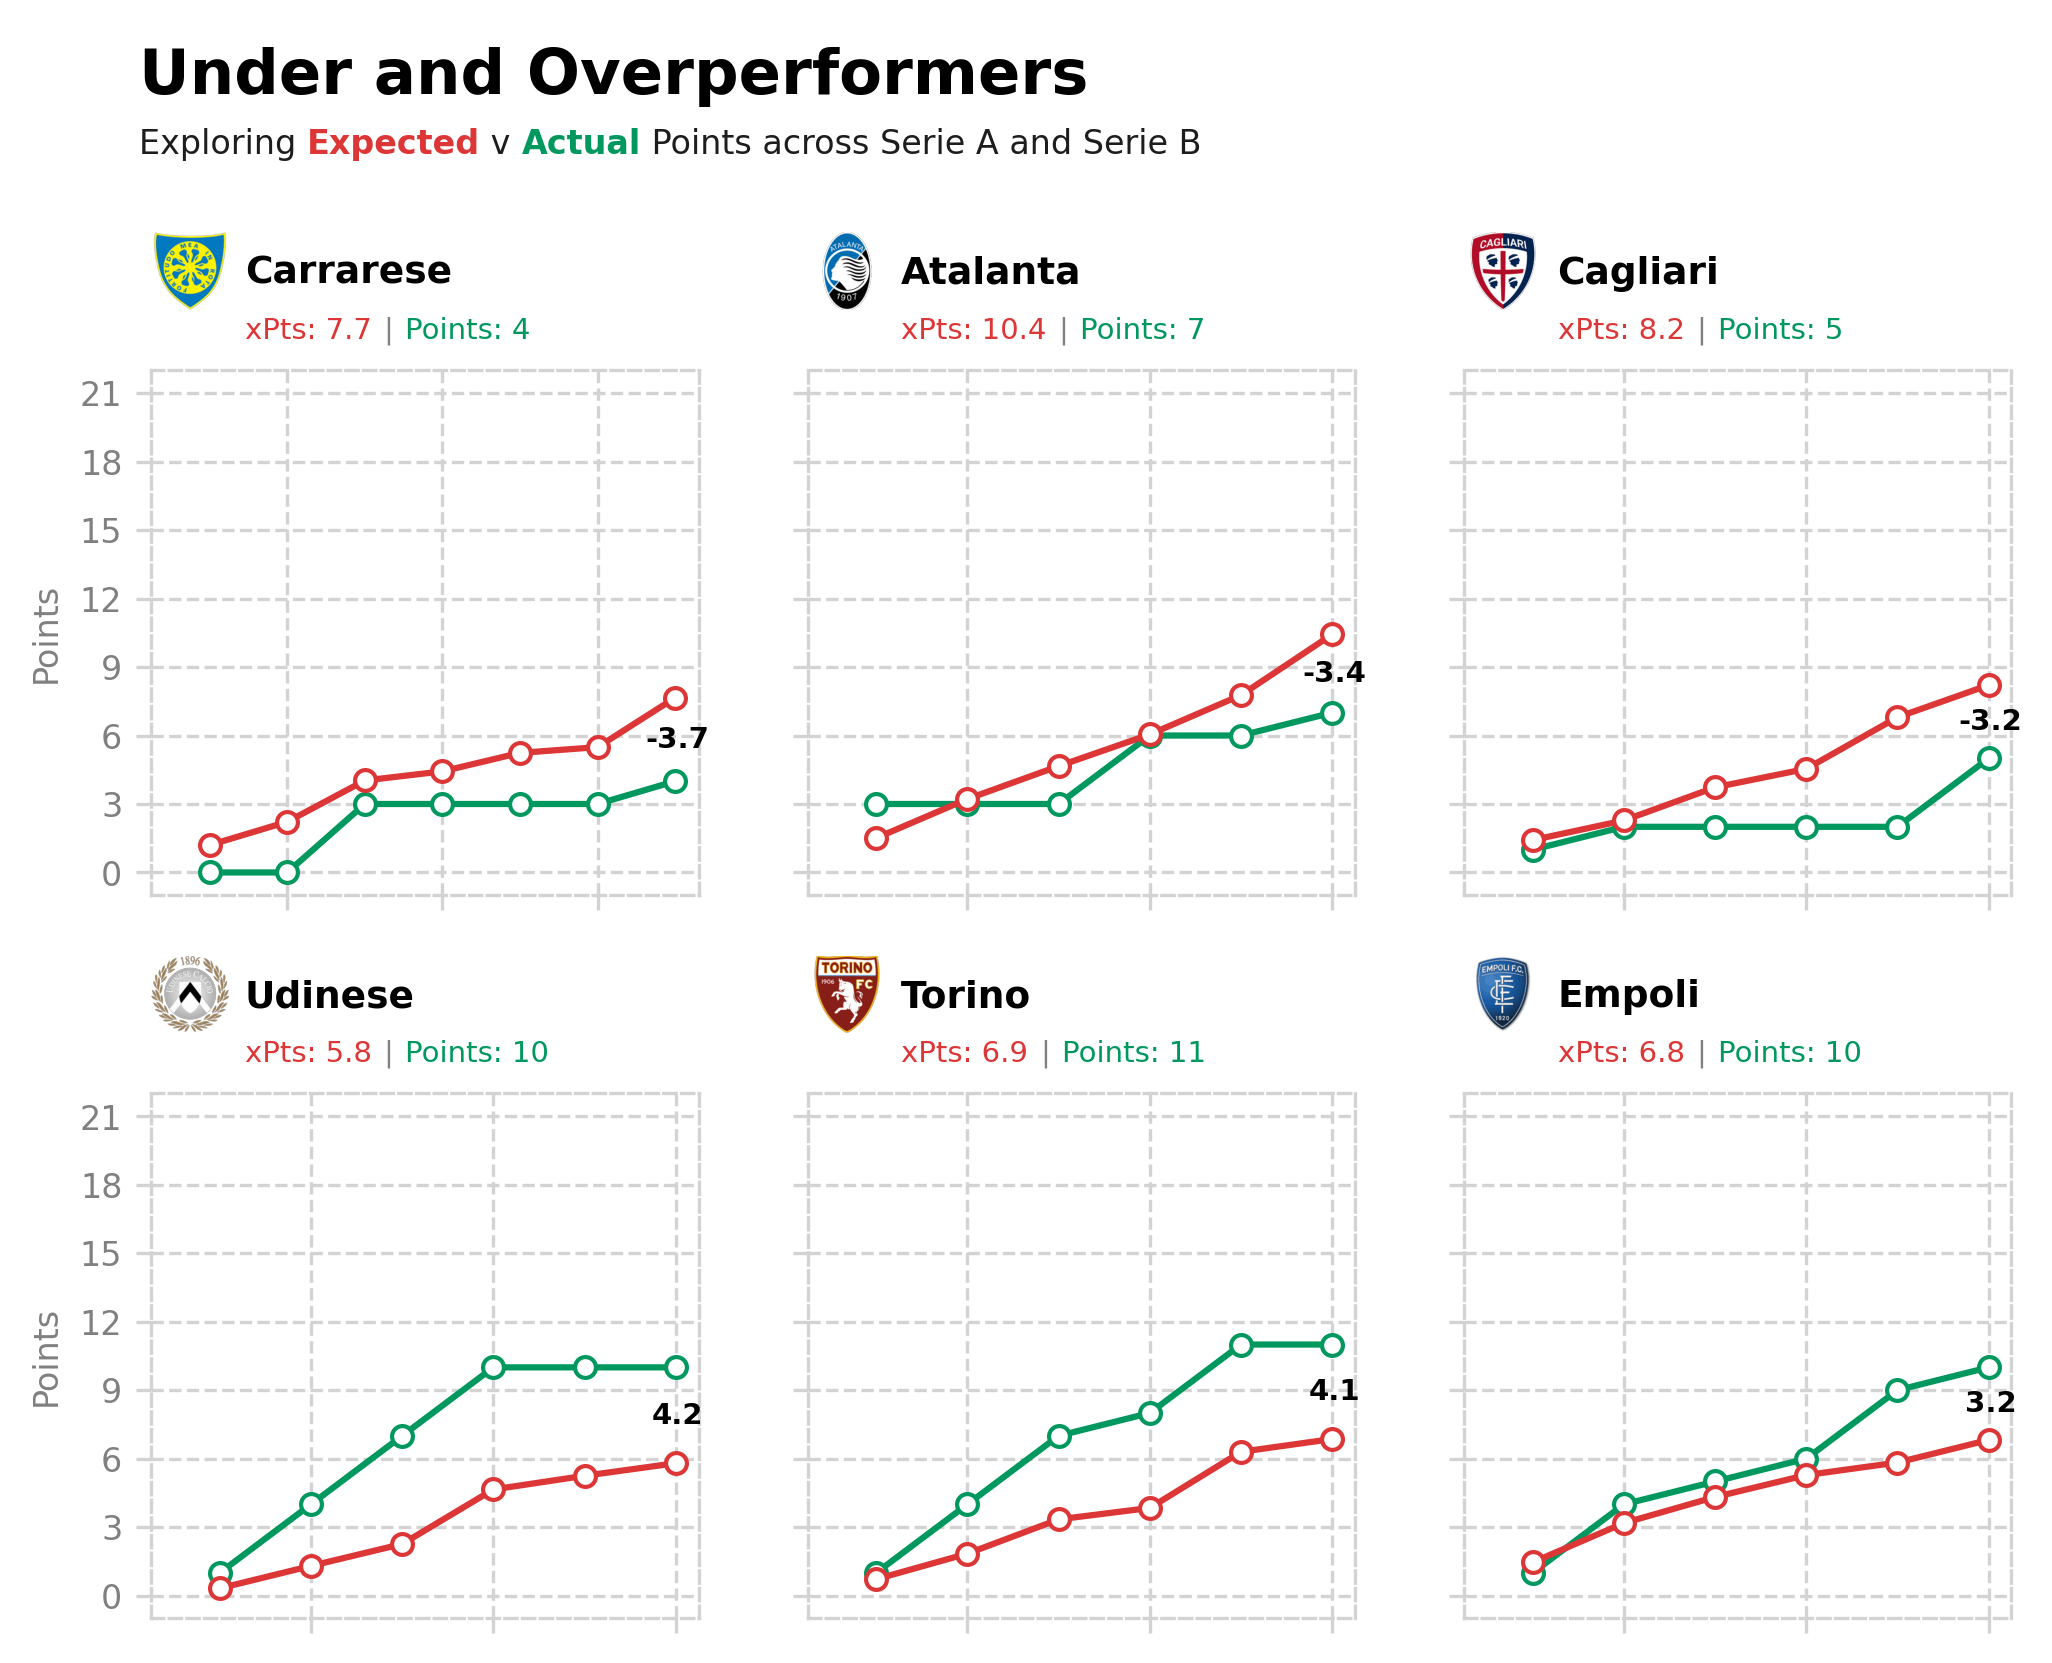

In [34]:
# create the figure and GridSpec layout
fig = plt.figure(figsize=(8, 6), dpi=300)
nrows, ncols = 4, 3
height_ratios = [(2.6 if x % 2 != 0 else 1 / 2.6) / nrows for x in range(nrows)]
gspec = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig, height_ratios=height_ratios, hspace=0.2)

plot_counter = 0
logo_counter = 0

for row in range(nrows):
    for col in range(ncols):
        ax = plt.subplot(gspec[row, col])
        
        if row % 2 != 0:  # plot points
            team = df_overunder['team'].iloc[plot_counter]
            label_y = (col == 0)
            plot_point_difference(ax, team, label_y)
            plot_counter += 1
        else:  # plot logos and text
            teamId = df_overunder['fotmob_id'].iloc[logo_counter]
            teamName = df_overunder['team'].iloc[logo_counter]
            xpoints = df_overunder['xPts'].iloc[logo_counter]
            apoints = df_overunder['points'].iloc[logo_counter]
            fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'

            logo_ax = plt.subplot(gspec[row, col], anchor='NW', facecolor='#EFE9E6')

            # load and display the club logo
            club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{teamId:.0f}.png'))
            logo_ax.imshow(club_icon)
            logo_ax.axis('off')

            # add the team name and points
            ax_text(
                x=1.2,
                y=0.7,
                s=f'<{teamName}>\n<xPts: {xpoints:.1f}> <|> <Points: {apoints:.0f}>',
                ax=logo_ax,
                highlight_textprops=[
                    {'weight': 'bold'},
                    {'size': '7', 'color': '#DD3636'},
                    {'size': '7', 'color': 'grey'},
                    {'size': '7', 'color': '#00985F'}
                ],
                ha='left',
                size=9,
                annotationbbox_kw={'xycoords': 'axes fraction'}
            )
            logo_counter += 1

# add figure title and description
fig_text(
    x=0.12, y=.95,
    s='Under and Overperformers',
    va='bottom', ha='left',
    fontsize=15, color='black', weight='bold'
)
fig_text(
    x=0.12, y=.92,
    s='Exploring <Expected> v <Actual> Points across Serie A and Serie B',
    highlight_textprops=[{'weight': 'bold', 'color': '#DD3636'}, {'weight': 'bold', 'color': '#00985F'}],
    va='bottom', ha='left',
    fontsize=8, color='#1D1D1D'
)

plt.savefig(
    "../figures/over_underperformers.png",
    dpi=300,
    facecolor="#EFE9E6",
    bbox_inches="tight",
    edgecolor="none",
    transparent=False
)